## **Mini-Project of Applied Statistics with EDA using Netflix Dataset :**
Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Description of each column in the dataset:

* show_id: A unique identifier for each show or movie.
* type: The type of content, either "Movie" or "TV Show."
* title: The title of the movie or TV show.
* director: The director of the movie or TV show. In the first and third entries, this information is not available (NaN).
* cast: The cast or actors in the movie or TV show. In the first entry, this information is not available (NaN). In the second entry, there is a list of actors from the TV show "Blood & Water."
* country: The country where the movie or TV show was produced or is associated with.
* date_added: The date when the content was added to the streaming platform, in the format "Month Day, Year."
* release_year: The year the movie or TV show was originally released.
* rating: The content's rating, which indicates the recommended audience age or maturity level (e.g., "PG-13" or "TV-MA").
* duration: The duration of the movie or TV show. In the first entry, the duration is given in minutes ("90 min"). In the second and third entries, it's indicated in the number of seasons ("2 Seasons" and "1 Season").
* listed_in: The genre or category of the content, which can help classify it (e.g., "Documentaries," "International TV Shows," "Crime TV Shows").
* description: A brief description or synopsis of the movie or TV show, providing an overview of the plot or subject matter.

In [138]:
# Importing all the necessary libraries for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [139]:
# Loading dataset
data = pd.read_csv("/netflix_titles.csv")

In [140]:
data1 = data.copy()
data2 = data.copy()

In [141]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [142]:
# complete information of the dataset and name the columns that has missing values
data.info()
missing_columns = data.columns[data.isnull().any()].tolist()
mv = ','.join(missing_columns)
print("None")
print(f"columns that has missing values are {mv}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None
columns that has missing values are director,cast,country,date_added,rating,duration


In [143]:
# Handling missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(data)

# Transforming data to fill missing values
new_data = pd.DataFrame(imputer.transform(data), columns=data.columns)
new_data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Rajiv Chilaka,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Rajiv Chilaka,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Rajiv Chilaka,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Rajiv Chilaka,David Attenborough,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [144]:
# checking missing values are handled successfully or not
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   object
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: object(12)
memory usage: 825.8+ KB


In [145]:
new_data1 = new_data.copy()
new_data2 = new_data.copy()

In [155]:
# top 10 countries contributing to the Content on Netflix
new_data["country"].unique()
new_country_colmun = new_data["country"].str.split(",")
new_country_colmun = new_data.explode("country")
new_country_colmun = new_data["country"].str.strip()

new_country_colmun.value_counts().head(10)


United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64

<ipython-input-161-dbe0d588be55>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top, y=top.index, palette='pastel',orient='h')


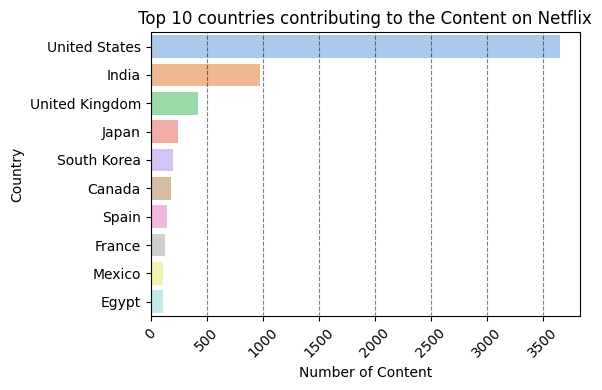

In [161]:
# visualization in barplot for top 10 countries contributing to the Content on Netflix
top = new_country_colmun.value_counts().head(10)
plt.figure(figsize=(6, 4))
sns.barplot(x=top, y=top.index, palette='pastel',orient='h')
plt.title('Top 10 countries contributing to the Content on Netflix')
plt.ylabel('Country')
plt.xlabel('Number of Content')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5,color="black")
plt.tight_layout()
plt.show()

In [160]:
# 5 most popular types of genre on the netflix

In [158]:
data1["listed_in"].unique()
data1["listed_in"] = data1["listed_in"].str.split(",")
data1 = data1.explode("listed_in")
data1["listed_in"] = data1["listed_in"].str.strip()

In [159]:
data1["listed_in"].value_counts().head(5)

International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64

<ipython-input-168-842515308889>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular5.index, y=popular5, palette='husl')


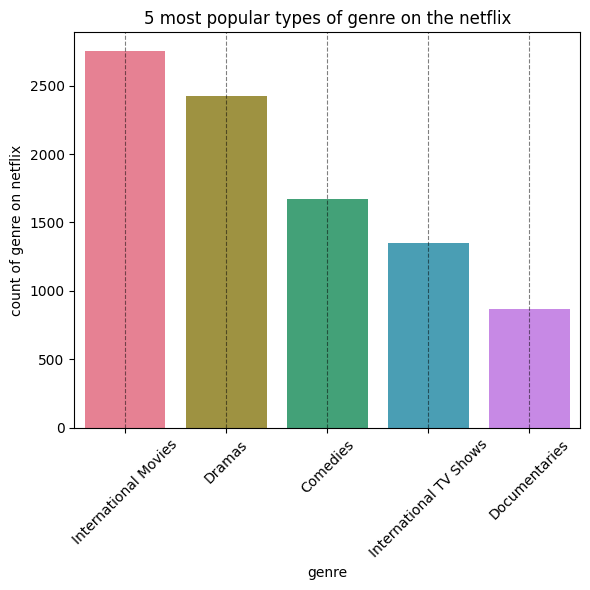

In [168]:
# visualizing the 5 most popular types of genre on the netflix in bar plot
popular5 = data1["listed_in"].value_counts().head(5)
plt.figure(figsize=(6, 6))
sns.barplot(x=popular5.index, y=popular5, palette='husl')
plt.title('5 most popular types of genre on the netflix')
plt.xlabel('genre')
plt.ylabel('count of genre on netflix')
plt.xticks(rotation=45)
plt.grid(axis='x', linestyle='--', alpha=0.5,color="black")
plt.tight_layout()
plt.show()

In [170]:
# categorizing into TV shows and Movies and displaying number of TV shows and movies
data2['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [175]:
# Grouping by release_year and type, and count the number of occurrences
count_data = data2.groupby(['release_year', 'type']).size().reset_index(name='count')

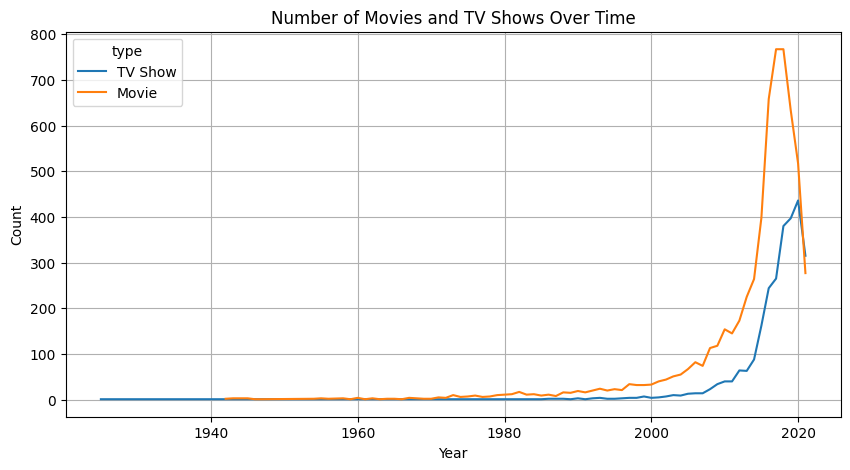

In [188]:
# Plotting number of movies and TV Shows Over Time
plt.figure(figsize=(10,5))

sns.lineplot(data=count_data, x=count_data['release_year'], y=count_data['count'], hue=count_data['type'])
plt.title('Number of Movies and TV Shows Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid()

plt.show()

In [61]:
# finding the measures of central tendency and dispersion of duration column by extracting numerical part of the duration column

# mean_ = data["duration"].mean()
data['duration_in_minutes'] = data['duration'].str.extract('(\d+)').astype(float)

# Central tendency measures
print(f"The mean duration is {data['duration_in_minutes'].mean()}")
print(f"The highest duration is {data['duration_in_minutes'].max()}")
print(f"The minimum duration is {data['duration_in_minutes'].min()}")

# Dispersion measures
print(f"The variance of duration is {data['duration_in_minutes'].var()}")
print(f"The standard deviation is {data['duration_in_minutes'].std()}")

iqr_duration = data['duration_in_minutes'].quantile(0.75) - data['duration_in_minutes'].quantile(0.25)
print("iqr of duration = ",iqr_duration)

The mean duration is 74.31682168258912
The highest duration is 312.0
The minimum duration is 1.0
The variance of duration is 2636.105259527503
The standard deviation is 51.34301568400032
iqr of duration =  106.0


In [62]:
from scipy.stats import iqr

In [63]:
# Plotting the histogram on Netflix Content Release Year Distribution

<Axes: >

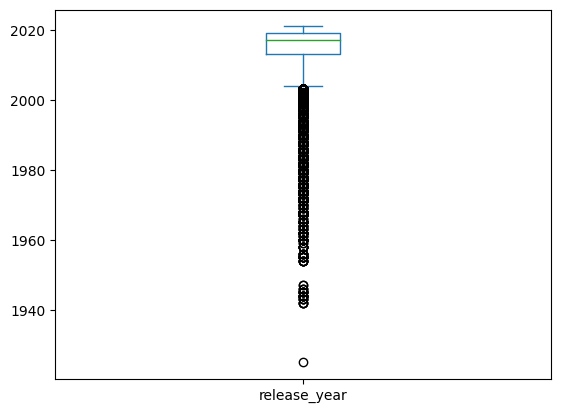

In [101]:
# Checking outliers in release year
data["release_year"].plot(kind="box")

In [67]:
# to remove handle outliers using IQR method
IQR_value = iqr(data1["release_year"])
lower_limit = data1["release_year"].quantile(0.25) - 1.5 * IQR_value
upper_limit = data1["release_year"].quantile(0.75) + 1.5 * IQR_value

In [68]:
# Remove outliers and create a new DataFrame without them
data_no_outliers = data1[(data1["release_year"] >= lower_limit) & (data1["release_year"] <= upper_limit)]

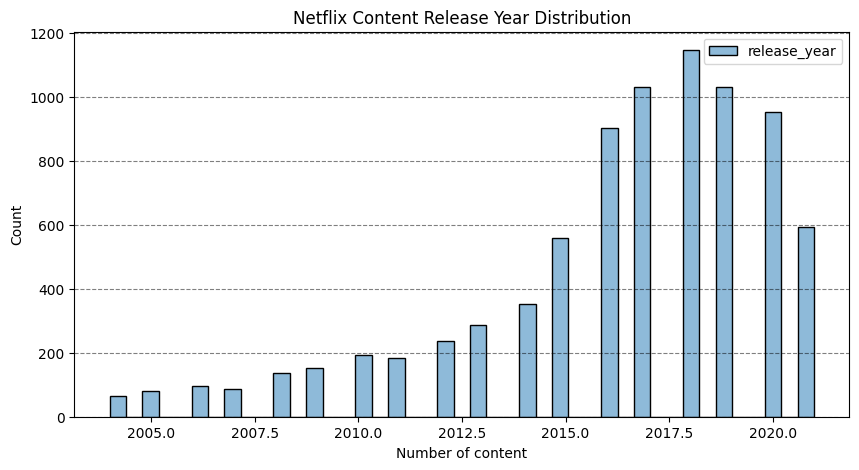

In [74]:
# Histogram plot after cleaning dataset
plt.figure(figsize=(10,5))
sns.histplot(data_no_outliers, edgecolor="black")
plt.title("Netflix Content Release Year Distribution")
plt.xlabel("Release Years")
plt.xlabel("Number of content")
plt.grid(axis='y', linestyle='--',color='black', alpha=0.5)
plt.show()

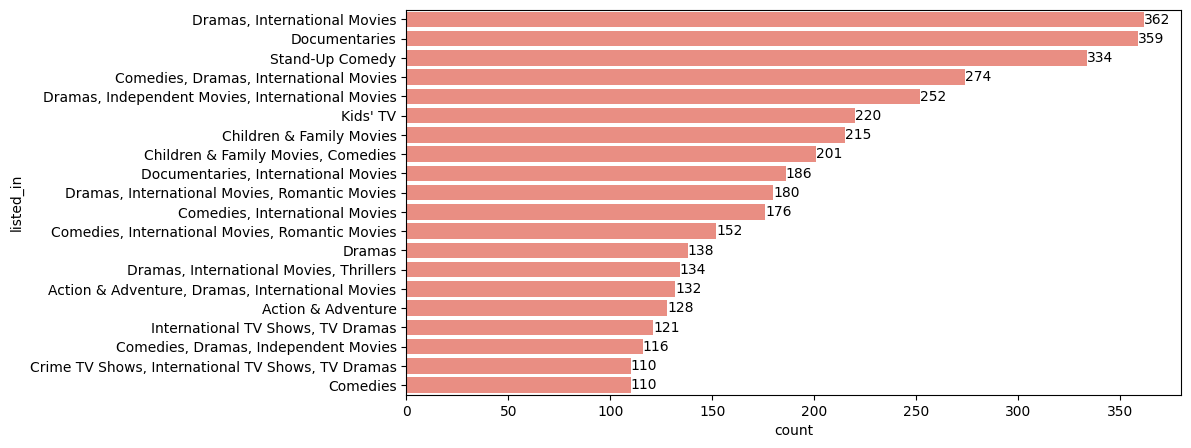

In [100]:
# Plotting the Distribution of Populartiy of different content categories using countplot
plt.figure(figsize=(10,5))
ax=sns.countplot(data=data1,y="listed_in", order=data1["listed_in"].value_counts().index[0:20],color='salmon')
ax.bar_label(ax.containers[0]) # to get values next to graphs

plt.show()